In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels import api as sm
import numpy as np
df = pd.read_csv("Heart.csv")
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


#### Columns of Dataset

In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

#### Population Proportion with different types of blood disorders

In [8]:
x = df.thal.value_counts()
x

2    544
3    410
1     64
0      7
Name: thal, dtype: int64

In [9]:
x/x.sum()

2    0.530732
3    0.400000
1    0.062439
0    0.006829
Name: thal, dtype: float64

#### Find the minimum, maximum, average, and standard deviation of Cholesterol data.

In [10]:
df.chol.describe()

count    1025.00000
mean      246.00000
std        51.59251
min       126.00000
25%       211.00000
50%       240.00000
75%       275.00000
max       564.00000
Name: chol, dtype: float64

#### Make a plot of the distribution of the Cholesterol data.


/var/folders/68/l23cjsw133d5gkhpn60nw9640000gn/T/ipykernel_76725/1339620784.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.chol.dropna())


<AxesSubplot: xlabel='chol', ylabel='Density'>

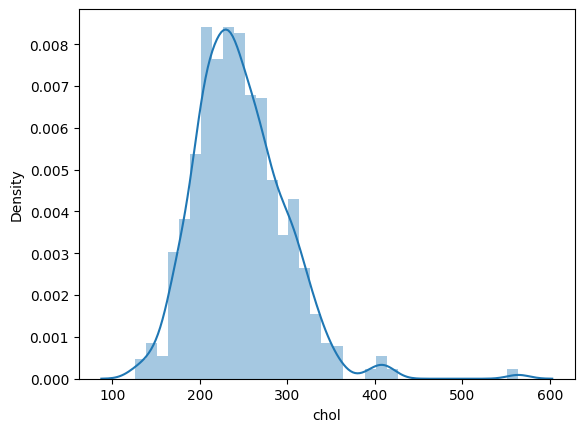

In [18]:
sns.distplot(df.chol.dropna())

#### Find the mean of the Resting Blood Pressure. Then, calculate the population proportion of the people who have the higher  Resting Blood Pressure than the mean RestBP.

In [20]:
mean_rbp = df.trestbps.dropna().mean()

In [21]:
mean_rbp

131.61170731707318

In [22]:
len(df[df["trestbps"] > mean_rbp])/len(df)

0.43414634146341463

#### Relation between Cholesterol and Age

In [23]:
df["agegrp"]=pd.cut(df.age, [29,40,50,60,70,80])

<AxesSubplot: xlabel='agegrp', ylabel='chol'>

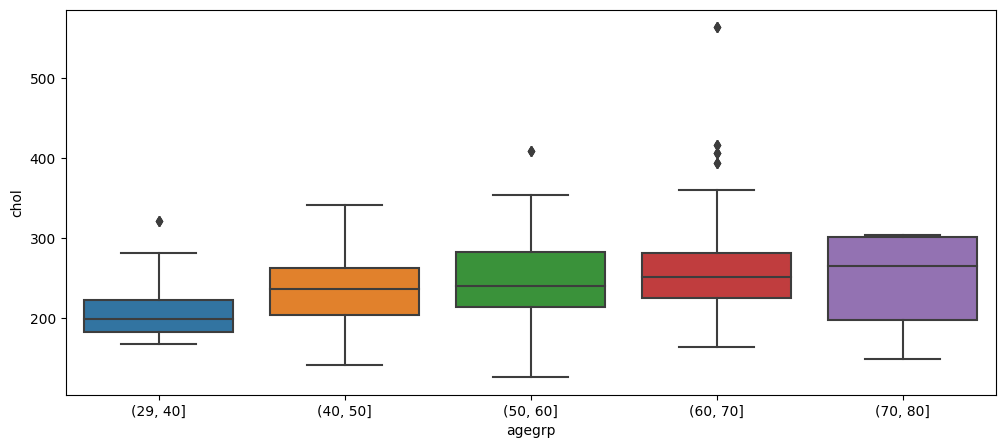

In [24]:
plt.figure(figsize=(12,5))
sns.boxplot(x = "agegrp", y = "chol", data=df)

####  It is a good idea to check if gender plays any role

<AxesSubplot: xlabel='agegrp', ylabel='chol'>

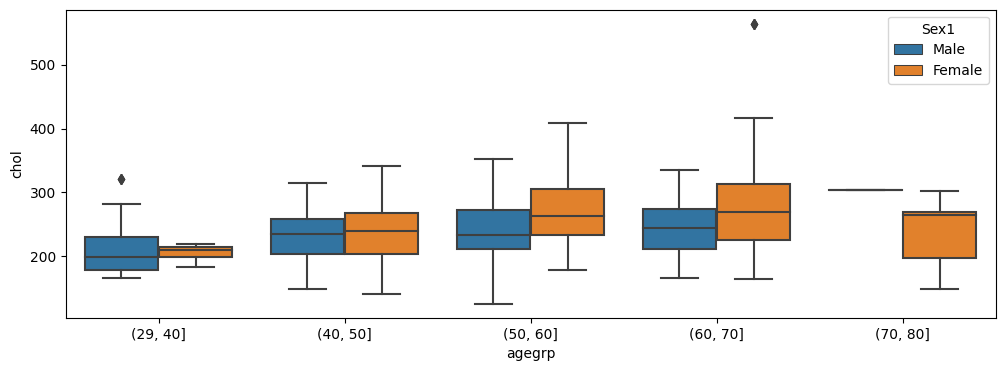

In [26]:
df["Sex1"] = df.sex.replace({1: "Male", 0: "Female"})
plt.figure(figsize=(12, 4))
sns.boxplot(x = "agegrp", y = "chol", hue = "Sex1", data=df)

In the age group of 70 to 80, there is cholesterol level only in the female population. That does not mean that the male population in that age has no cholesterol. In our dataset, we do not have enough male population in that age group.

##### Plotting the male and female population against the age.

<AxesSubplot: xlabel='Sex1', ylabel='age'>

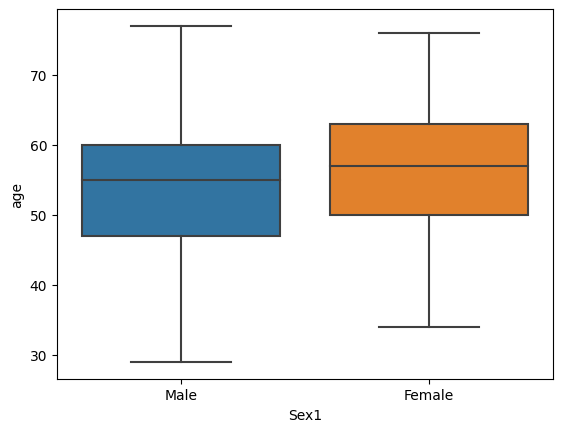

In [28]:
sns.boxplot(x = "Sex1", y = "age", data=df)

#### Relationship between Age Group and Chest pain

In [37]:
df["CP1"] = df.cp.replace({0: "asympotatic", 1: "nonanginal", 2:"nontypical", 3:"typical"})
df.groupby('agegrp')["CP1"].value_counts().unstack()

CP1,asympotatic,nonanginal,nontypical,typical
agegrp,,,,
"(29, 40]",23.0,7.0,24.0,10.0
"(40, 50]",95.0,65.0,81.0,6.0
"(50, 60]",225.0,69.0,110.0,34.0
"(60, 70]",147.0,16.0,62.0,27.0
"(70, 80]",7.0,6.0,7.0,NaN


#### Adding the Gender variable 

In [39]:
df.dropna().groupby(["agegrp", "Sex1"])["CP1"].value_counts().unstack()

CP1              asympotatic  nonanginal  nontypical  typical
agegrp   Sex1                                                
(29, 40] Female          4.0         3.0        10.0      NaN
         Male           19.0         4.0        14.0     10.0
(40, 50] Female         19.0        25.0        24.0      NaN
         Male           76.0        40.0        57.0      6.0
(50, 60] Female         50.0        20.0        36.0      7.0
         Male          175.0        49.0        74.0     27.0
(60, 70] Female         56.0         3.0        32.0      6.0
         Male           91.0        13.0        30.0     21.0
(70, 80] Female          4.0         6.0         7.0      NaN
         Male            3.0         NaN         NaN      NaN